In [1]:
import cv2
from matplotlib import pyplot as plt
import sys
sys.path.append("/home/kastan/thesis/video-pretrained-transformer/data_preprocessing/openpsg_inference")
import predict

/home/kastan/utils/miniconda3/envs/openpsg/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/kastan/thesis/data/simple_test_data/rick_roll.mp4
FPS:  25.0


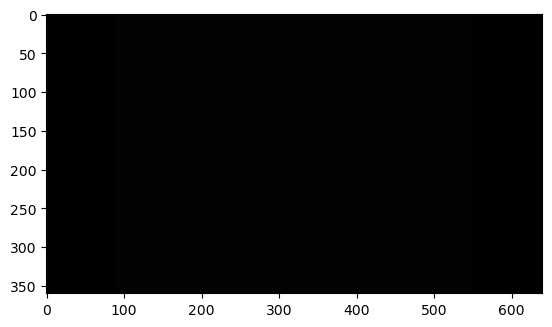

load checkpoint from local path: checkpoints/epoch_60.pth


/home/kastan/utils/miniconda3/envs/openpsg/lib/python3.7/site-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


[]


In [2]:
video_name = "/home/kastan/thesis/data/simple_test_data/rick_roll.mp4"
print(video_name)
cap = cv2.VideoCapture(video_name)
fps = cap.get(cv2.CAP_PROP_FPS)
print("FPS: ", fps)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

size = (frame_width, frame_height)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
result = cv2.VideoWriter('./segment_video.mp4', fourcc, fps, size)

timestamps = [cap.get(cv2.CAP_PROP_POS_MSEC)]
curr_timestamp = 0.0

frames = []
cnt = 0

while(cap.isOpened()):
  cnt += 1
  if cnt < 500:
    continue
  # print("function called")
  frame_exists, curr_frame = cap.read()
  # display(curr_frame)
  
  plt.imshow(curr_frame)
  plt.show()
  
  scene_graph_preds = predict.Predictor().predict(image=curr_frame, num_rel=5)
  print(scene_graph_preds)
  break
